<a href="https://colab.research.google.com/github/kurkur19/Intelligent_Data_Analysis_Al_Khmuz_BS_25/blob/main/%D0%92%D1%81%D1%82%D1%83%D0%BF_%D0%B4%D0%BE_%D0%86%D0%90%D0%94_%D0%91%D0%A1_25_%D0%90%D0%BB%D1%8C_%D0%A5%D0%BC%D1%83%D0%B7_%D0%9A%D0%9F_%E2%84%961.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd


In [6]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [8]:
data = pd.read_csv('Iris.csv')

In [11]:
data.isnull().any()

,0
Id,False
SepalLengthCm,False
SepalWidthCm,False
PetalLengthCm,False
PetalWidthCm,False
Species,False


<Axes: >

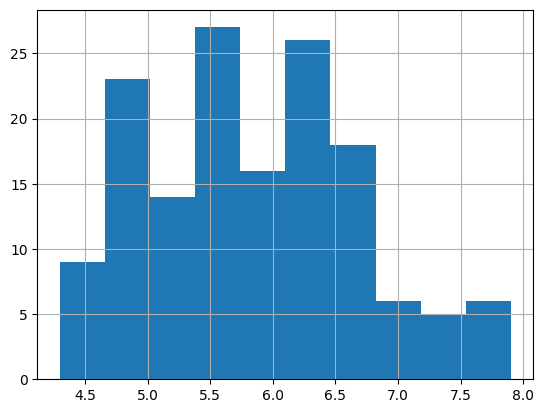

In [14]:
data['SepalLengthCm'].hist()

In [2]:
# Функция для расчета метрик
def calculate_distances(matrix):
    # Извлечение точек
    point1 = matrix[0]
    point2 = matrix[1]

    # Евклидова метрика
    euclidean_squared = np.sum((point1 - point2)**2)  # Квадрат Евклидова расстояния
    euclidean = np.sqrt(euclidean_squared)  # Евклидово расстояние

    # Чебышева
    chebyshev = np.max(np.abs(point1 - point2))

    # Миньковского с параметром p=3 (можно изменить для других значений p)
    minkowski_p3 = np.sum(np.abs(point1 - point2)**3)**(1/3)

    return {
        'Квадрат Евклидова': euclidean_squared,
        'Евклидово': euclidean,
        'Чебышева': chebyshev,
        'Миньковского (p=3)': minkowski_p3
    }

# Пример данных: строки - точки, столбцы - параметры
matrix = np.array([
    [7.7, 2.8, 6.7, 2],   # Первая точка
    [5.5, 2.3, 4.0, 1.3]  # Вторая точка (пример другой цветок)
])

# Рассчитаем метрики для всех 4 параметров
distances_4_params = calculate_distances(matrix)

# Выведем результат
distances_4_params


{'Квадрат Евклидова': 12.870000000000003,
 'Евклидово': 3.58747822293042,
 'Чебышева': 2.7,
 'Миньковского (p=3)': 3.1345764897590516}

In [3]:
# Функция для вывода результатов в таблице
def calculate_and_display(matrix, num_params):
    results = []

    for n in num_params:
        # Обрезаем матрицу до нужного числа параметров (столбцов)
        truncated_matrix = matrix[:, :n]
        distances = calculate_distances(truncated_matrix)
        results.append([distances['Квадрат Евклидова'], distances['Евклидово'], distances['Чебышева'], distances['Миньковского (p=3)']])

    # Создаем DataFrame для визуализации
    df = pd.DataFrame(results, columns=['Квадрат Евклидова', 'Евклидово', 'Чебышева', 'Миньковского (p=3)'], index=[f'{n} параметра(ов)' for n in num_params])
    return df

# Рассчитаем метрики для 2, 3 и 4 параметров
num_params = [2, 3, 4]
df_results = calculate_and_display(matrix, num_params)

# Выведем таблицу
df_results


,Квадрат Евклидова,Евклидово,Чебышева,Миньковского (p=3)
2 параметра(ов),5.09,2.256103,2.2,2.208575
3 параметра(ов),12.38,3.518522,2.7,3.122897
4 параметра(ов),12.87,3.587478,2.7,3.134576
